In [2]:
# Install required libraries (run this in Jupyter Notebook)


# Import Libraries
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
import PyPDF2
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('SoftwareProfessionalExtra.csv')

In [5]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [6]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [7]:
import spacy
from PyPDF2 import PdfReader


In [8]:
from PyPDF2 import PdfReader
pdf_path=r"C:\Users\HARSHAL SINALKAR\Desktop\Resume Harshal.pdf"
# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

# Example usage
resume_path = r"C:\Users\HARSHAL SINALKAR\Desktop\Resume Harshal.pdf"   # Replace with your resume file path
resume_text = extract_text_from_pdf(resume_path)
print(resume_text)


HARSHAL SINALKAR  
Pune,Maharashtra | harshalsinalkar@gmail.com  | +91 8378813312 |        |  
EDUCATION  
DYPIEMR  | B.E MECHANICAL                           Ravet,Pune  | 2022 -Present  
• F.E : - 7.89 
• S.E:- 8.61 
Modern  College  | HSC  | 77.17% | PCM | I.T 98/100|                      Nigdi ,Pune |2020 -2022  
SPM  School  | SSC | 86%                              Nigdi ,Pune |2020  
SKILLS  
Languages: Python ,C++  | Web Dev : HTML,CSS,Bootstrap,ReactJs  , PHP| Database Management : MySQL  |  
Deep Learning : TensorFlow |  
Projects  
FE NOTEMATE | HTML,CSS,MyS QL|           2022  
Developed SPPU Notemate , an app providing organized notes for SPPU first -year students. Implemented a 
responsive UI using HTML and CSS,  while leveraging MySQL for efficient backend data management and storage 
of academic resources.  
FORMECHULATOR  | HTML ,CSS ,BootStrap,PHP,ReactJS .|    2023  
Developed Formechulator , a website featuring fast, efficient calculators for engineering, solid, and 

In [9]:
import spacy

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract skills from resume text
def extract_skills_from_text(text, job_roles_column):
    # Combine all job roles into a single skill pool
    all_skills = set()
    for roles in df[job_roles_column]:
        all_skills.update(roles.split(", "))  # Split roles by commas
    
    # Tokenize the resume text and match skills
    doc = nlp(text)
    extracted_skills = [token.text for token in doc if token.text in all_skills]
    return list(set(extracted_skills))

# Extract skills from the resume
skills = extract_skills_from_text(resume_text, "Job Roles")
print("Extracted Skills:", skills)


Extracted Skills: ['Web', 'Database', 'Python']


In [10]:
# Function to match skills with dataset and recommend roles/companies
def match_roles_and_companies(skills, df):
    # Add a combined field for matching
    df['Combined'] = df['Job Roles'] + ", " + df['Job Title']
    
    # Match skills with job roles
    df['Matching_Skills'] = df['Job Roles'].apply(lambda x: len(set(x.split(", ")) & set(skills)))
    df['Skill_Match_Percentage'] = (df['Matching_Skills'] / df['Job Roles'].str.split(", ").apply(len)) * 100
    
    # Sort and return recommendations
    return df.sort_values(by='Skill_Match_Percentage', ascending=False)[['Company Name', 'Job Title', 'Salary', 'Location', 'Skill_Match_Percentage']]

# Get recommendations
matched_roles = match_roles_and_companies(skills, df)
print("Top Matches:")
print(matched_roles.head())


Top Matches:
              Company Name                  Job Title   Salary   Location  \
11385   BA Continuum India           Python Developer   900000    Chennai   
10965           Sutherland           Python Developer    46464  Bangalore   
10973  Huawei Technologies           Python Developer   300000  Bangalore   
10972                  ABB  Python Developer - Intern   100000  Bangalore   
10971              Vedantu  Python Developer - Intern  1000000  Bangalore   

       Skill_Match_Percentage  
11385                   100.0  
10965                   100.0  
10973                   100.0  
10972                   100.0  
10971                   100.0  


In [11]:
# Import Libraries
import spacy
from PyPDF2 import PdfReader
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("SoftwareProfessionalExtra.csv")

# Function to extract text from PDF
pdf_path=r"C:\Users\HARSHAL SINALKAR\Desktop\Resume Harshal.pdf"
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    

# Function to extract skills
def extract_skills_from_text(text, job_roles_column):
    all_skills = set()
    for roles in df[job_roles_column]:
        all_skills.update(roles.split(", "))
    doc = nlp(text)
    return list(set([token.text for token in doc if token.text in all_skills]))

# Function to match roles and companies
def match_roles_and_companies(skills, df):
    df['Combined'] = df['Job Roles'] + ", " + df['Job Title']
    df['Matching_Skills'] = df['Job Roles'].apply(lambda x: len(set(x.split(", ")) & set(skills)))
    df['Skill_Match_Percentage'] = (df['Matching_Skills'] / df['Job Roles'].str.split(", ").apply(len)) * 100
    return df.sort_values(by='Skill_Match_Percentage', ascending=False)[['Company Name', 'Job Title', 'Salary', 'Location', 'Skill_Match_Percentage']]

# Input: Resume PDF
resume_path = r"C:\Users\HARSHAL SINALKAR\Desktop\Resume Harshal.pdf"
resume_text = extract_text_from_pdf(resume_path)

# Extract skills
skills = extract_skills_from_text(resume_text, "Job Roles")
print("Extracted Skills:", skills)

# Match roles and companies
matched_roles = match_roles_and_companies(skills, df)
print("Top Matches:")
print(matched_roles.head())


Extracted Skills: ['Web', 'Database', 'Python']
Top Matches:
              Company Name                  Job Title   Salary   Location  \
11385   BA Continuum India           Python Developer   900000    Chennai   
10965           Sutherland           Python Developer    46464  Bangalore   
10973  Huawei Technologies           Python Developer   300000  Bangalore   
10972                  ABB  Python Developer - Intern   100000  Bangalore   
10971              Vedantu  Python Developer - Intern  1000000  Bangalore   

       Skill_Match_Percentage  
11385                   100.0  
10965                   100.0  
10973                   100.0  
10972                   100.0  
10971                   100.0  


In [13]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles', 'Combined',
       'Matching_Skills', 'Skill_Match_Percentage'],
      dtype='object')

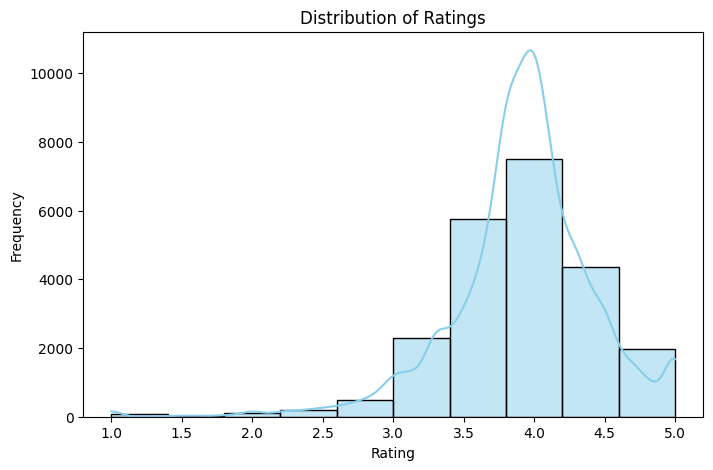

In [15]:
# HistPlotting
plt.figure(figsize=(8, 5))
sb.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


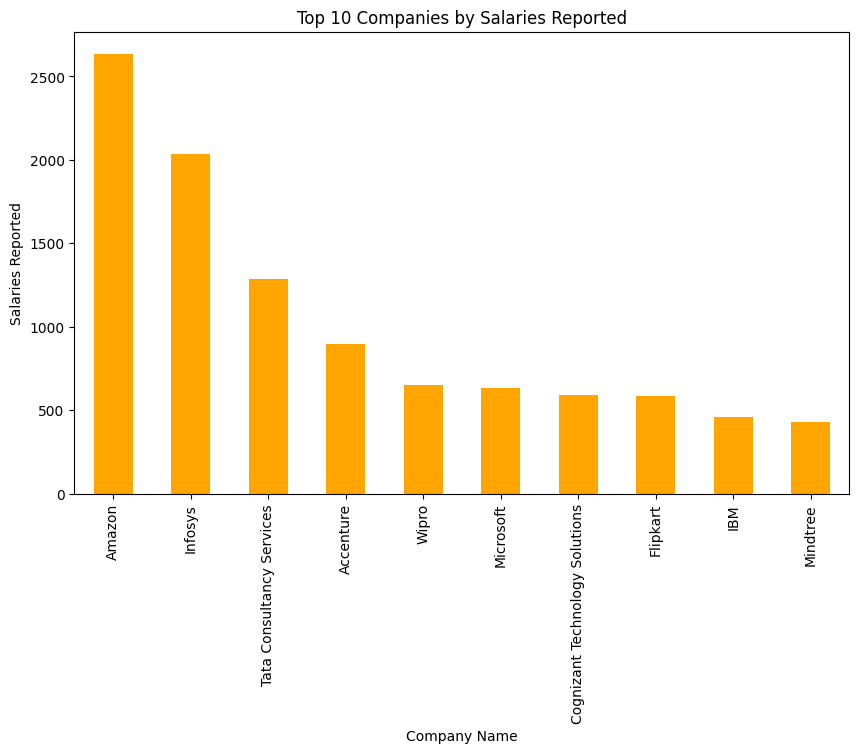

In [17]:
# 2. Top 10 Companies by Salaries Reported
top_companies = df.groupby('Company Name')['Salaries Reported'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='orange')
plt.title('Top 10 Companies by Salaries Reported')
plt.xlabel('Company Name')
plt.ylabel('Salaries Reported')
plt.xticks(rotation=90)
plt.show()


From above this We can know that amazon company has given the largest package


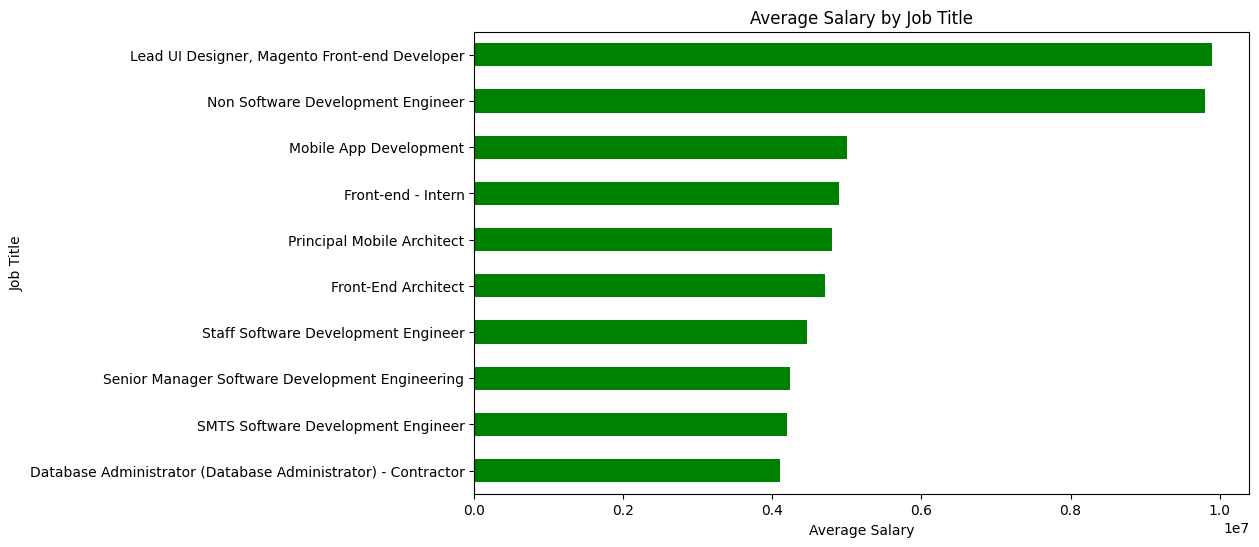

In [18]:
# 3. Average Salary by Job Title
average_salary = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
average_salary.plot(kind='barh', color='green')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.show()

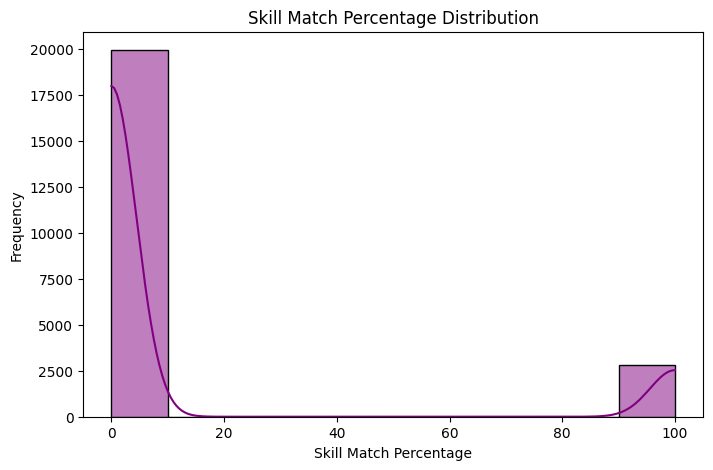

In [20]:
# 4. Skill Match Percentage Distribution
plt.figure(figsize=(8, 5))
sb.histplot(df['Skill_Match_Percentage'], bins=10, kde=True, color='purple')
plt.title('Skill Match Percentage Distribution')
plt.xlabel('Skill Match Percentage')
plt.ylabel('Frequency')
plt.show()


C:\Users\HARSHAL SINALKAR\AppData\Local\Temp\ipykernel_7976\2058411792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


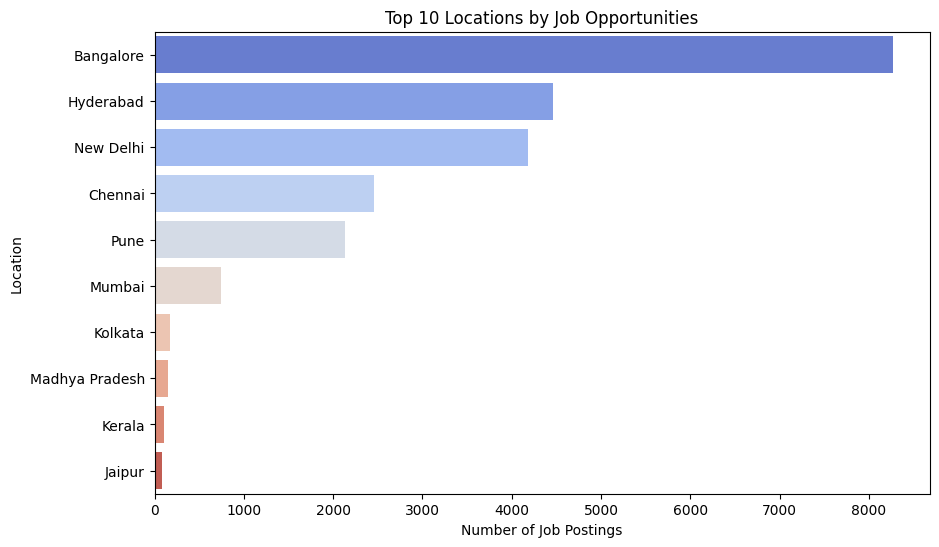

In [24]:
# 6. Top Locations by Job Opportunities
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sb.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations by Job Opportunities')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()